# Evaluating Logistic Regression Models - Lab

## Introduction

As we saw with KNN, we need alternative evaluation metrics to determine the effectiveness of classification algorithms. In regression, we were predicting values so it made sense to discuss error as a distance of how far off our estimates were. In classifying a binary variable however, we are either correct or incorrect. As a result, we tend to deconstruct this as how many false positives versus false negatives we come across.

In particular, we examine a few different specific measurements when evaluating the performance of a classification algorithm. In this review lab, we'll review precision, recall and accuracy in order to evaluate our logistic regression models.


## Objectives
You will be able to:  
* Understand and assess precision recall and accuracy of classifiers
* Evaluate classification models using various metrics

## Terminology Review  

Let's take a moment and review some classification evaluation metrics:  


$Precision = \frac{\text{Number of True Positives}}{\text{Number of Predicted Positives}}$    
  

$Recall = \frac{\text{Number of True Positives}}{\text{Number of Actual Total Positives}}$  
  
$Accuracy = \frac{\text{Number of True Positives + True Negatives}}{\text{Total Observations}}$

![](./images/Precisionrecall.png)

At times, we may wish to tune a classification algorithm to optimize against precison or recall rather then overall accuracy. For example, imagine the scenario of predicting whether or not a patient is at risk for cancer and should be brought in for additional testing. In cases such as this, we often may want to cast a slightly wider net, and it is much preferable to optimize for recall, the number of cancer positive cases, than it is to optimize precision, the percentage of our predicted cancer-risk patients who are indeed positive.

## 1. Split the data into train and test sets

In [1]:
import pandas as pd
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
from sklearn.model_selection import train_test_split

y = df.target
X = df.drop(columns=['target'])

for col in X.columns:
    X[col] = (X[col] - min(X[col])) / (max(X[col]) - min(X[col]))

X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=123)

## 2. Create a standard logistic regression model

In [4]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept=False, C=1e12)
model = logreg.fit(X_train, y_train)

yhat_train = model.predict(X_train)
yhat_test = model.predict(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## 3. Write a function to calculate the precision

In [5]:
def true_pos(y_hat, y):
    tp = 0
    y = list(y)
    for i in range(len(y)):
        if y_hat[i] == 1 and y[i]==1:
            tp += 1 
    return tp

In [6]:
def precision(y_hat, y):
    tp = true_pos(y_hat, y)
    return tp/sum(y_hat)

## 4. Write a function to calculate the recall

In [7]:
def recall(y_hat, y):
    tp = true_pos(y_hat, y)
    return tp/sum(y)

## 5. Write a function to calculate the accuracy

In [8]:
def accuracy(y_hat, y):
    tp = true_pos(y_hat, y)
    tn = 0
    y=list(y)
    for i in range(len(y)):
        if y_hat[i] == 0 and y[i]==0:
            tn += 1 
    return (tp + tn) / len(y)

## 6. Calculate the precision, recall and accuracy of your classifier

Do this for both the train and the test set.

In [9]:
prec_train = precision(yhat_train, y_train)
rec_train = recall(yhat_train, y_train)
acc_train = accuracy(yhat_train, y_train)

print(f'Train Precision: {prec_train}')
print(f'Train Recall: {rec_train}')
print(f'Train Accuracy: {acc_train}')

Train Precision: 0.8707482993197279
Train Recall: 0.9552238805970149
Train Accuracy: 0.8966942148760331


In [10]:
prec_test = precision(yhat_test, y_test)
rec_test = recall(yhat_test, y_test)
acc_test = accuracy(yhat_test, y_test)

print(f'Test Precision: {prec_test}')
print(f'Test Recall: {rec_test}')
print(f'Test Accuracy: {acc_test}')

Test Precision: 0.7666666666666667
Test Recall: 0.7419354838709677
Test Accuracy: 0.7540983606557377


## 7. Comparing Precision Recall and Accuracy of Test vs Train Sets


Plot the precision, recall and accuracy for test and train splits using different train set sizes. What do you notice?

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
import warnings
# warnings.simplefilter('ignore')

training_Precision = []
testing_Precision = []
training_Recall = []
testing_Recall = []
training_Accuracy = []
testing_Accuracy = []

for i in range(10,95):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= i*.01) #replace the "None" here
    logreg = LogisticRegression(fit_intercept = False, C = 1e12)
    model_log = logreg.fit(X_train, y_train)
    y_hat_test = model_log.predict(X_test)
    y_hat_train = model_log.predict(X_train)
    
    training_Precision.append(precision(y_hat_train, y_train))
    training_Recall.append(recall(y_hat_train, y_train))
    training_Accuracy.append(accuracy(y_hat_train, y_train))
    
    testing_Precision.append(precision(y_hat_test, y_test))
    testing_Recall.append(recall(y_hat_test, y_test))
    testing_Accuracy.append(accuracy(y_hat_test, y_test))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Create 3 scatter plots looking at the test and train precision in the first one, test and train recall in the second one, and testing and training accuracy in the third one.

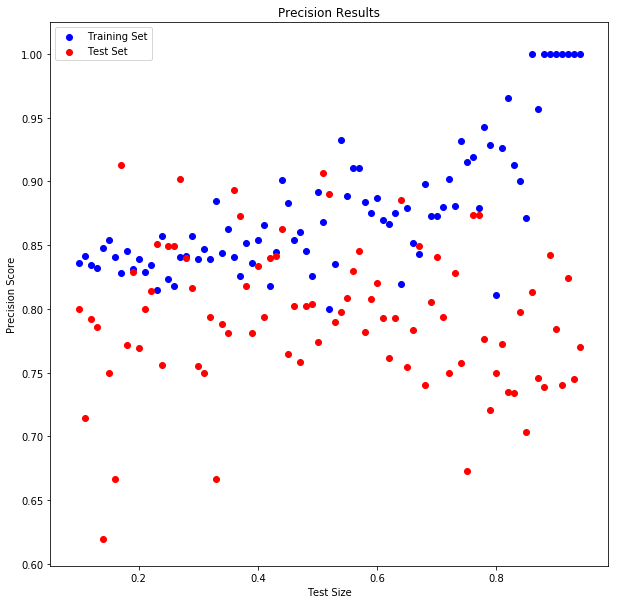

In [13]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 10))
plt.scatter(np.arange(.10, .95, .01), training_Precision, color='b', label='Training Set')
plt.scatter(np.arange(.10, .95, .01), testing_Precision, color='r', label='Test Set')
plt.xlabel('Test Size')
plt.ylabel('Precision Score')
plt.legend()
plt.title('Precision Results')
plt.show()

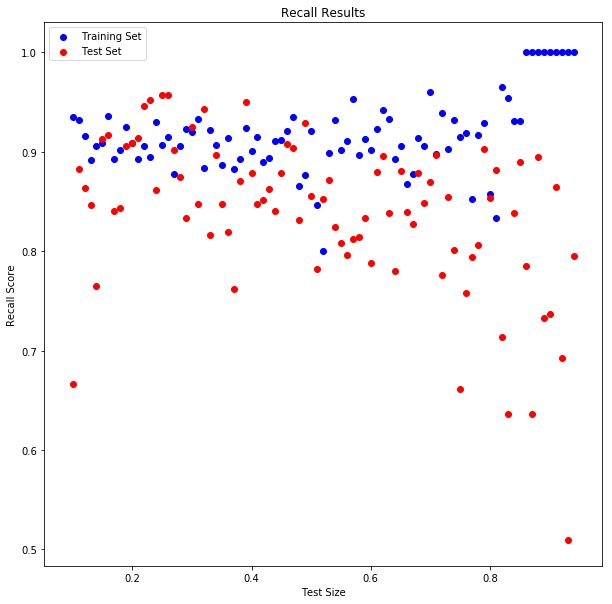

In [14]:
plt.figure(figsize=(10, 10))
plt.scatter(np.arange(.10, .95, .01), training_Recall, color='b', label='Training Set')
plt.scatter(np.arange(.10, .95, .01), testing_Recall, color='r', label='Test Set')
plt.xlabel('Test Size')
plt.ylabel('Recall Score')
plt.legend()
plt.title('Recall Results')
plt.show()

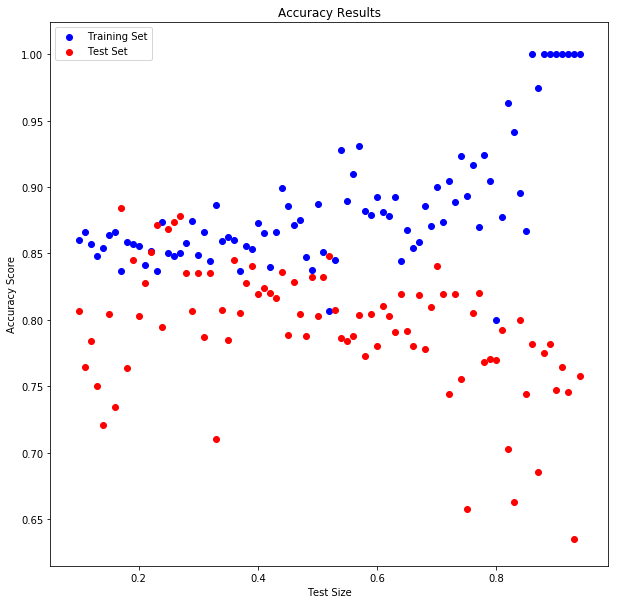

In [15]:
plt.figure(figsize=(10, 10))
plt.scatter(np.arange(.10, .95, .01), training_Accuracy, color='b', label='Training Set')
plt.scatter(np.arange(.10, .95, .01), testing_Accuracy, color='r', label='Test Set')
plt.xlabel('Test Size')
plt.ylabel('Accuracy Score')
plt.legend()
plt.title('Accuracy Results')
plt.show()

## Summary

Nice! In this lab, you gained some extra practice with evaluation metrics for classification algorithms. You also got some further python practice by manually coding these functions yourself, giving you a deeper understanding of how they work. Going forward, continue to think about scenarios in which you might prefer to optimize one of these metrics over another.